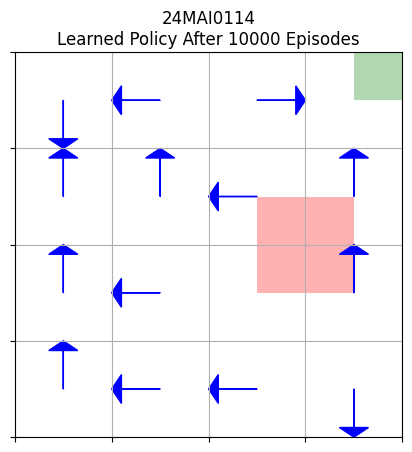

In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Define the environment
grid_size = 4
goal_state = (3, 3)
obstacle = (1, 2)
actions = ['up', 'down', 'left', 'right']
action_dict = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}

# Initialize Q-table
Q = np.zeros((grid_size, grid_size, len(actions)))

# Parameters
alpha = 0.5  # Learning rate
gamma = 0.8  # Reduced discount factor
epsilon = 1.0  # Start with full exploration
epsilon_min = 0.01
epsilon_decay = 0.995
episodes = 10000
reward = 100
penalty = -100
plot_interval = 500  # Plot every 500 episodes
max_steps_per_episode = 50

# Helper functions
def choose_action(state, epsilon):
    """Choose an action using epsilon-greedy policy."""
    if random.uniform(0, 1) < epsilon:
        return random.choice(actions)  # Explore
    else:
        return actions[np.argmax(Q[state[0], state[1], :])]  # Exploit
#24MAI0114 ABHAYNATHK
def take_action(state, action):
    """Take an action and return the new state and reward."""
    new_state = (state[0] + action_dict[action][0], state[1] + action_dict[action][1])
    new_state = (max(0, min(new_state[0], grid_size - 1)), max(0, min(new_state[1], grid_size - 1)))  # Bound state
    if new_state == obstacle:
        return new_state, penalty  # Hit obstacle
    elif new_state == goal_state:
        return new_state, reward  # Reach goal
    else:
        return new_state, 0  # Neutral reward for other moves

def plot_policy(Q, episode):
    """Plot the learned policy with arrows showing the best action for each state."""
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(-0.5, grid_size - 0.5)
    ax.set_ylim(-0.5, grid_size - 0.5)
    ax.set_xticks(np.arange(-0.5, grid_size, 1))
    ax.set_yticks(np.arange(-0.5, grid_size, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)

    # Draw goal state and obstacle
    rect = plt.Rectangle(goal_state[::-1], 1, 1, facecolor='green', alpha=0.3)
    ax.add_patch(rect)
    rect = plt.Rectangle(obstacle[::-1], 1, 1, facecolor='red', alpha=0.3)
    ax.add_patch(rect)

    # Draw policy arrows
    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) == goal_state or (i, j) == obstacle:
                continue
            best_action = np.argmax(Q[i, j])
            if best_action == 0:  # up
                ax.arrow(j, i, 0, -0.4, head_width=0.3, head_length=0.1, fc='b', ec='b')
            elif best_action == 1:  # down
                ax.arrow(j, i, 0, 0.4, head_width=0.3, head_length=0.1, fc='b', ec='b')
            elif best_action == 2:  # left
                ax.arrow(j, i, -0.4, 0, head_width=0.3, head_length=0.1, fc='b', ec='b')
            elif best_action == 3:  # right
                ax.arrow(j, i, 0.4, 0, head_width=0.3, head_length=0.1, fc='b', ec='b')

    plt.title(f"24MAI0114\nLearned Policy After {episode} Episodes")
    plt.show()

# SARSA algorithm with visualization
for episode in range(episodes):
    state = (0, 0)  # Start state
    action = choose_action(state, epsilon)  # Initial action
    step = 0  # Track number of steps per episode

    while state != goal_state and step < max_steps_per_episode:
        new_state, reward = take_action(state, action)
        new_action = choose_action(new_state, epsilon)
        
        # Update the Q-value for the current state-action pair
        Q[state[0], state[1], actions.index(action)] += alpha * (
            reward + gamma * Q[new_state[0], new_state[1], actions.index(new_action)]
            - Q[state[0], state[1], actions.index(action)]
        )
        
        state, action = new_state, new_action
        step += 1  # Increment step count

    # Decay exploration rate
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Update plot every plot_interval episodes
    if episode % plot_interval == 0:
        plot_policy(Q, episode)
        plt.pause(0.01)  # Short pause to allow for updates

# Final policy plot
plot_policy(Q, episodes)
